### **Key Components to Implement**
1. **Recurrent Neural Networks (RNNs)**:
   - Two layers: Sensory layer and M1 layer.
   - Sensory layer processes proprioceptive feedback.
   - M1 layer generates descending commands to muscles.

2. **Spinal Reflex**:
   - Afferent feedback from muscle kinematics (length, velocity, acceleration, jerk).
   - Reflex gain applied to the afferent feedback.

3. **Muscle Activation Dynamics**:
   - Combines descending commands from M1 and spinal reflex.
   - Includes time delays for neural and spinal reflex pathways.

4. **Musculoskeletal Model**:
   - Two-segment arm with six muscles.
   - Muscle activations produce forces, which generate joint torques and motion.

5. **Feedback Loop**:
   - Joint angles, velocities, and muscle states are fed back to the RNNs and spinal reflex.

---

### **1. Sensory Layer (`y_s`)**
- **Description**: Represents the sensory cortex, which processes sensory feedback (`u_fb`).
- **Number of Units**: `n_s = 200` (as per the researchers' description).
- **Shape**: `[n_s]` or `[200]` (a 1D tensor with 200 elements).

---

### **2. Motor Layer (`y_m`)**
- **Description**: Represents the motor cortex, which generates descending commands to muscles.
- **Number of Units**: `n_m1 = 200` (as per the researchers' description).
- **Shape**: `[n_m1]` or `[200]` (a 1D tensor with 200 elements).

---

### **3. Muscle Activation Layer (`y_act`)**
- **Description**: Projects the motor cortex output to the muscles. The number of units matches the number of muscles.
- **Number of Units**: `n_muscles = 6` (6 muscles in the `myoElbow` model).
- **Shape**: `[n_muscles]` or `[6]` (a 1D tensor with 6 elements).

---

### **4. Feedback Input (`u_fb`)**
- **Description**: Proprioceptive feedback, including joint angles, velocities, and muscle forces.
- **Components**:
  - `θ_d(t)`: Delayed joint angles (e.g., shoulder and elbow).
  - `θ_g`: Goal joint angles.
  - `F_m`: Muscle forces (6 muscles).
- **Shape**: `[n_inputs]` or `[10]` (2 joint angles + 2 joint velocities + 6 muscle forces).

---

### **5. Afferent Feedback (`x_aff`)**
- **Description**: Encodes muscle kinematics (length, velocity, acceleration, jerk) for each muscle.
- **Components**:
  - `Δx_ml`: Muscle length changes.
  - `x_mv`: Muscle velocities.
  - `x_ma`: Muscle accelerations.
  - `x_mj`: Muscle jerks.
- **Shape**: `[n_muscles, 4]` or `[6, 4]` (6 muscles × 4 kinematic states).

---

### **6. Weight Matrices**
- **Sensory Layer Weights (`w_sr`, `w_si`)**:
  - `w_sr`: Recurrent weights for the sensory layer.
    - Shape: `[n_s, n_s]` or `[200, 200]`.
  - `w_si`: Weights connecting sensory feedback to the sensory layer.
    - Shape: `[n_s, n_inputs]` or `[200, 10]`.

- **Motor Layer Weights (`w_mr`, `w_mi`)**:
  - `w_mr`: Recurrent weights for the motor layer.
    - Shape: `[n_m1, n_m1]` or `[200, 200]`.
  - `w_mi`: Weights connecting the sensory layer to the motor layer.
    - Shape: `[n_m1, n_s]` or `[200, 200]`.

- **Muscle Activation Weights (`w_act`)**:
  - Weights connecting the motor layer to the muscle activation layer.
    - Shape: `[n_muscles, n_m1]` or `[6, 200]`.

---

### **7. Bias Terms**
- **Sensory Layer Bias (`b_s`)**:
  - Shape: `[n_s]` or `[200]`.
- **Motor Layer Bias (`b_m`)**:
  - Shape: `[n_m1]` or `[200]`.

---

### **8. Reflex Parameters**
- **Stretch Reflex Gain (`G_s`)**:
  - Scalar value (e.g., `0.8` or `1.9`).
- **Afferent Encoding Gains (`G_aff`)**:
  - Shape: `[4]` (for length, velocity, acceleration, jerk).

---

### **9. Neural Dynamics**
- **Sensory Layer Dynamics**:
  - `y_s(t+Δt) = (1-(Δt/τ_n))*y_s(t) + (Δt/τ_n) * tanh(u_s(t))`
  - Shape of `y_s`: `[n_s]` or `[200]`.
- **Motor Layer Dynamics**:
  - `y_m(t+Δt) = (1-(Δt/τ_n))*y_m(t) + (Δt/τ_n) * tanh(u_m(t))`
  - Shape of `y_m`: `[n_m1]` or `[200]`.
- **Muscle Activation Dynamics**:
  - `y_act(t+Δt) = (1-(Δt/τ_m))*y_act(t) + (Δt/τ_m) * ReLU(u_act(t))`
  - Shape of `y_act`: `[n_muscles]` or `[6]`.

---

### **10. Observation (`obs`)**
- **Description**: The observation returned by the environment.
- **Components**:
  - `qpos`: Joint positions (e.g., shoulder and elbow).
  - `qvel`: Joint velocities.
  - `act`: Muscle activations.
- **Shape**: `[10]` (as per the `myoElbow` environment).

---

### **Summary of Shapes**

| Component                  | Shape         | Description                                      |
|----------------------------|---------------|--------------------------------------------------|
| `y_s` (Sensory Layer)      | `[200]`       | Sensory cortex output.                          |
| `y_m` (Motor Layer)        | `[200]`       | Motor cortex output.                            |
| `y_act` (Muscle Activation)| `[6]`         | Muscle activation output.                       |
| `u_fb` (Feedback Input)    | `[10]`         | Proprioceptive feedback.                        |
| `x_aff` (Afferent Feedback)| `[6, 4]`      | Muscle kinematics (length, velocity, etc.).     |
| `w_sr`                    | `[200, 200]`  | Sensory layer recurrent weights.               |
| `w_si`                    | `[200, 10]`    | Sensory feedback to sensory layer weights.      |
| `w_mr`                    | `[200, 200]`  | Motor layer recurrent weights.                 |
| `w_mi`                    | `[200, 200]`  | Sensory layer to motor layer weights.           |
| `w_act`                   | `[6, 200]`    | Motor layer to muscle activation weights.       |
| `b_s` (Sensory Bias)       | `[200]`       | Sensory layer bias.                             |
| `b_m` (Motor Bias)         | `[200]`       | Motor layer bias.                               |
| `G_s`                     | `scalar`      | Stretch reflex gain.                            |
| `G_aff`                   | `[4]`         | Afferent encoding gains.                        |
| `obs`                     | `[10]`         | Observation from the environment.               |

---

In [1]:
# Import necessary libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import myosuite
import gymnasium as gym

MyoSuite:> Registering Myo Envs


Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
Users of this version of Gym should be able to simply replace 'import gym' with 'import gymnasium as gym' in the vast majority of cases.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.
/opt/anaconda3/envs/opensim_scripting/lib/python3.11/site-packages/gymnasium/envs/registration.py:694: UserWarning: WARN: Overriding environment myoArmReachFixed-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/opt/anaconda3/envs/opensim_scripting/lib/python3.11/site-packages/gymnasium/envs/registration.py:694: UserWarning: WARN: Overriding environment myoSarcArmReachFixed-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec

In [2]:
# --- Simulation parameters ---
dt = 0.01       # Time step (10 ms)
tau_n = 0.02    # Neuron time constant (20 ms)
tau_m = 0.05    # Muscle time constant (50 ms)

# --- Neural network parameters ---
n_s = 200       # Number of sensory neurons
n_m1 = 200      # Number of motor neurons
n_muscles = 6   # Number of muscles
n_inputs = 10   # Size of proprioceptive feedback (from myoElbow observation)

# --- Feedback gains ---
G_p = 1.0       # Gain for position error
G_d = 1.0       # Gain for velocity
G_f = 1.0       # Gain for muscle forces

# --- Reflex parameters ---
G_aff = torch.tensor([1, 0.1, 0.01, 0.0001])  # Encoding gains for length, velocity, acceleration, jerk
G_s_low = 0.8                                 # Spinal reflex gain (low reflex gain)
G_s_high = 1.9                                # Spinal reflex gain (high reflex gain)
reflex_delay = int(0.02 / dt)                 # Spinal reflex delay (20 ms)

# --- Transcortical afferent delay ---
feedback_delay_steps = int(0.04 / dt)         # Transcortical afferent delay (40 ms)

# --- Muscle length ---
L_m = torch.ones(n_muscles, requires_grad=True)

# --- Buffers for delayed feedback ---
joint_angle_buffer = [torch.zeros(2) for _ in range(feedback_delay_steps)]
joint_velocity_buffer = [torch.zeros(2) for _ in range(feedback_delay_steps)]

# --- Movement arm matrix (Mm) ---
M_m = torch.tensor([
    [0.05, 0.00],  # DELT1 (shoulder flexor)
    [0.05, 0.00],  # DELT2 (shoulder extensor)
    [0.00, 0.04],  # PECM3 (elbow flexor)
    [0.00, 0.04],  # TRIlong (elbow extensor)
    [0.03, 0.03],  # BIClong (biarticular biceps)
    [0.03, 0.03],  # TRImed (biarticular triceps)
], dtype=torch.float32)

# --- Target joint positions ---
target_qpos = torch.tensor([1.5, 1.0], dtype=torch.float32)  # Desired joint positions (shoulder, elbow)

# --- Penalty coefficients for cost function ---
alpha = 0.0001  # Penalizes neural activity
beta = 0.01     # Penalizes force output
gamma = 0.5     # Penalizes kinematic error

# --- Time parameters for background and perturbation loads ---
Tb = 200 / 1000    # Background load onset (200 ms)
Tp = 1500 / 1000   # Perturbation load onset (1500 ms)
T = 3000 / 1000    # Total motion time (3000 ms)
Tsb = 1000 / 1000  # Steady-state realization of background load (1000 ms)
Tsp = 2500 / 1000  # Steady-state realization of perturbation load (2500 ms)

# --- External loads ---
background_load_low = 0.1    # Low background load (Nm)
background_load_high = 0.55  # High background load (Nm)
perturbation_load = 0.25     # Perturbation load (Nm)

In [3]:
# Initialize the MyoArm environment
env = gym.make("myoArmReachFixed-v0")
obs, info = env.reset()

    MyoSuite: A contact-rich simulation suite for musculoskeletal motor control
        Vittorio Caggiano, Huawei Wang, Guillaume Durandau, Massimo Sartori, Vikash Kumar
        L4DC-2019 | https://sites.google.com/view/myosuite
    


| **Index Range** | **Description**               | **Source in info**               |
|-----------------|-------------------------------|----------------------------------|
| 0:20            | Joint positions (qpos)        | info['obs_dict']['qpos']         |
| 20:40           | Joint velocities (qvel)       | info['obs_dict']['qvel']         |
| 40:43           | Tip position (tip_pos)        | info['obs_dict']['tip_pos']      |
| 43:46           | Reach error (reach_err)       | info['obs_dict']['reach_err']    |
| 46:78           | Muscle activations (act)      | info['obs_dict']['act']          |


In [4]:
# # Print joint names
# for joint_id in range(env.sim.model.njnt):  # env.sim.model.njnt gives the number of joints
#     joint_name = env.sim.model.id2name(joint_id, 'joint')
#     print(f"Joint ID {joint_id+1}: {joint_name}")

# print("\n")

# # Print actuator (muscle) names
# for actuator_id in range(env.sim.model.nu):  # env.sim.model.nu gives the number of actuators
#     actuator_name = env.sim.model.id2name(actuator_id, 'actuator')
#     print(f"Actuator ID {actuator_id+1}: {actuator_name}")

In [5]:
# List of joint IDs to fix (1-based indexing)
joints_to_fix = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 16, 17, 18, 19, 20]

# Convert to 0-based indexing for MuJoCo
joints_to_fix = [joint_id - 1 for joint_id in joints_to_fix]

# Fix joint positions and velocities
for joint_id in joints_to_fix:
    env.sim.data.qpos[joint_id] = 0.0  # Set position to 0
    env.sim.data.qvel[joint_id] = 0.0  # Set velocity to 0

# Disable activations for muscles not of interest
muscles_of_interest = ['DELT1', 'DELT2', 'PECM3', 'TRIlong', 'BIClong', 'TRImed']

for actuator_id in range(env.sim.model.nu):  # Iterate over all actuators
    actuator_name = env.sim.model.id2name(actuator_id, 'actuator')
    if actuator_name not in muscles_of_interest:
        env.sim.data.act[actuator_id] = 0.0  # Set activation to 0

/opt/anaconda3/envs/opensim_scripting/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.sim to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.sim` for environment variables or `env.get_wrapper_attr('sim')` that will search the reminding wrappers.
  logger.warn(


---

In [6]:
# Define the NeuralLimbController
class NeuralLimbController(nn.Module):
    """Neural controller for a two-segment limb model."""

    def __init__(self, n_inputs, n_outputs=n_muscles):
        """Initialize the neural controller."""
        super(NeuralLimbController, self).__init__()
        
        # Sensory layer (input layer)
        self.w_sr = nn.Parameter(torch.empty(n_s, n_s).uniform_(-1/np.sqrt(n_inputs), 1/np.sqrt(n_inputs)))
        self.w_si = nn.Parameter(torch.empty(n_s, n_inputs).uniform_(-1/np.sqrt(n_inputs), 1/np.sqrt(n_inputs)))
        self.b_s = nn.Parameter(torch.zeros(n_s))

        # M1 layer (output layer)
        self.w_mr = nn.Parameter(torch.empty(n_m1, n_m1).uniform_(-1/np.sqrt(n_s), 1/np.sqrt(n_s)))
        self.w_mi = nn.Parameter(torch.empty(n_m1, n_s).uniform_(-1/np.sqrt(n_s), 1/np.sqrt(n_s)))
        self.b_m = nn.Parameter(torch.zeros(n_m1))
        
        # Muscle activation layer weights (from M1 to muscle)
        self.w_act = nn.Parameter(torch.empty(n_muscles, n_m1).uniform_(-1/np.sqrt(n_m1), 1/np.sqrt(n_m1)))
        
        # Internal state variables
        self.y_s = torch.zeros(n_s)          # Sensory Layer output (y_s(t))
        self.y_m = torch.zeros(n_m1)         # M1 Layer output (y_m(t))
        self.y_act = torch.zeros(n_muscles)  # Muscle Activation output (y_act(t))
    
    def neural_activation_step(self, y_t, u_t):
        """Discretized neural activation dynamics."""
        return (1 - (dt / tau_n)) * y_t + (dt / tau_n) * torch.tanh(u_t)
    
    def muscle_activation_step(self, y_act_t, u_act_t):
        """Discretized muscle activation dynamics."""
        return (1 - (dt / tau_m)) * y_act_t + (dt / tau_m) * torch.relu(u_act_t)

    def forward_step(self, u_fb_t, x_aff_t, y_s_delayed_t):
        """Perform a single forward step of the neural controller."""
        # Sensory layer input (u_s) and output (y_s)
        u_s = self.w_sr @ y_s_delayed_t + self.w_si @ u_fb_t + self.b_s
        self.y_s = self.neural_activation_step(self.y_s, u_s)
        
        # M1 layer input (u_m) and output (y_m)
        u_m = self.w_mr @ self.y_m + self.w_mi @ self.y_s + self.b_m
        self.y_m = self.neural_activation_step(self.y_m, u_m)
        
        # Muscle activation layer input (u_act) and output (y_act)
        u_act = self.w_act @ self.y_m + G_s_low * x_aff_t
        self.y_act = self.muscle_activation_step(self.y_act, u_act)
        
        return self.y_act

In [7]:
# Instantiate the neural controller
controller = NeuralLimbController(n_inputs=n_inputs, n_outputs=n_muscles)

# Set up optimizer
optimizer = torch.optim.Adam(controller.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.1)

In [8]:
def compute_costs(controller, qpos, qvel, F_m, delayed_qpos, delayed_qvel, target_qpos):
    """Compute the neural, force, and kinematic costs."""
    # Neural cost
    neural_cost = controller.y_s.pow(2).mean() + controller.y_m.pow(2).mean()

    # Force output cost
    force_cost = F_m.pow(2).mean()

    # Kinematic cost
    J_b_1 = (qpos - target_qpos).pow(2).mean() + 0.5 * qvel.pow(2).mean()  # [0, T_b]
    J_b_2 = (qpos - target_qpos).pow(2).mean() + 0.5 * qvel.pow(2).mean()  # [T_sb, T_p]
    J_b = (J_b_1 / Tb) + (J_b_2 / (Tp - Tsb))
    J_p = (qpos - target_qpos).pow(2).mean() + 0.5 * qvel.pow(2).mean()    # [T_sp, T]
    J_p /= (T - Tsp)
    kinematic_cost = J_b + J_p

    return neural_cost, force_cost, kinematic_cost, J_b, J_p


def compute_weighted_costs(neural_cost, force_cost, kinematic_cost, J_b, J_p, alpha, beta, gamma):
    """Compute weighted components of the cost."""
    return {
        "neural": alpha * neural_cost,
        "force": beta * force_cost,
        "J_b": gamma * J_b,
        "J_p": gamma * J_p,
        "kinematic": gamma * kinematic_cost,
        "total": alpha * neural_cost + beta * force_cost + gamma * kinematic_cost,
    }


def compute_and_accumulate_costs(controller, qpos, qvel, F_m, delayed_qpos, delayed_qvel, target_qpos, total_costs):
    """Compute costs, apply weights, and accumulate them into total_costs."""
    # Compute costs
    neural_cost, force_cost, kinematic_cost, J_b, J_p = compute_costs(controller, qpos, qvel, F_m, delayed_qpos, delayed_qvel, target_qpos)
    weighted_costs = compute_weighted_costs(neural_cost, force_cost, kinematic_cost, J_b, J_p, alpha, beta, gamma)

    # Accumulate costs
    for key in total_costs:
        total_costs[key] += weighted_costs[key].item()

    return weighted_costs["total"]

In [9]:
# Training loop
num_epochs = 100
epoch_costs = {"neural": [], "force": [], "kinematic": [], "J_b": [], "J_p": [], "total": []}
pose_errors = []
rewards = []

for epoch in range(num_epochs):
    obs, info = env.reset()
    terminated, truncated = False, False
    total_costs = {key: 0 for key in ["neural", "force", "kinematic", "J_b", "J_p", "total"]}
    step_count = 0

    while not (terminated or truncated):
        # Detach internal states
        for state in [controller.y_s, controller.y_m, controller.y_act]:
            state.detach_()

        # Extract observation components
        qpos = torch.tensor([obs[11], obs[14]], dtype=torch.float32, requires_grad=True)
        qvel = torch.tensor([obs[31], obs[34]], dtype=torch.float32, requires_grad=True)
        act = torch.tensor([obs[46], obs[47], obs[56], obs[61], obs[66], obs[63]], dtype=torch.float32, requires_grad=True)

        # Compute muscle length changes
        dLm_dt = - M_m @ qvel.unsqueeze(1)
        L_m = L_m + dLm_dt.squeeze() * dt
        L_m, dLm_dt = L_m.detach(), dLm_dt.detach()

        # Update delayed feedback buffers
        joint_angle_buffer.append(qpos)
        joint_velocity_buffer.append(qvel)
        delayed_qpos = joint_angle_buffer.pop(0)
        delayed_qvel = joint_velocity_buffer.pop(0)

        # Compute muscle forces (F_m) using FL and FV properties
        FL = torch.clamp(1.0 - (L_m - 1.0).pow(2), min=0.0)
        FV = torch.clamp(1.0 - dLm_dt.abs(), min=0.0).squeeze()
        F_m = act * FL * FV

        # Compute feedback input (u_fb)
        position_error = G_p * (delayed_qpos - target_qpos)
        velocity_feedback = G_d * delayed_qvel
        force_feedback = G_f * F_m
        u_fb = torch.cat([position_error.unsqueeze(0), velocity_feedback.unsqueeze(0), force_feedback.unsqueeze(0)], dim=1)

        # Compute and accumulate costs
        total_cost = compute_and_accumulate_costs(controller, qpos, qvel, F_m, delayed_qpos, delayed_qvel, target_qpos, total_costs)

        # Backpropagation
        optimizer.zero_grad()
        total_cost.backward()
        torch.nn.utils.clip_grad_norm_(controller.parameters(), max_norm=1.0)
        optimizer.step()

        # Generate muscle activations using the neural controller
        x_aff_t = torch.zeros(n_muscles)
        u_fb_t = u_fb.squeeze(0)
        muscle_activations = controller.forward_step(
            u_fb_t=u_fb_t,
            x_aff_t=x_aff_t,
            y_s_delayed_t=controller.y_s
        )

        # Create a full action tensor of size 32
        full_action = torch.zeros(32, dtype=torch.float32)
        muscles_of_interest = [0, 1, 10, 15, 20, 17]
        for i, muscle_idx in enumerate(muscles_of_interest):
            full_action[muscle_idx] = muscle_activations[i]

        # Step the environment
        obs, reward, terminated, truncated, info = env.step(full_action.detach().numpy())
        step_count += 1

        # Track pose error and reward
        pose_errors.append(torch.norm(qpos - target_qpos).item())
        rewards.append(reward)

    # Compute average costs for the epoch
    avg_costs = {key: total_costs[key] / step_count for key in total_costs}

    # Store costs for the epoch
    for key in epoch_costs:
        epoch_costs[key].append(avg_costs[key])

    # Print progress every 100 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{num_epochs} | Neural: {avg_costs['neural']:.4f} | Force: {avg_costs['force']:.4f} | Kinematic (Jb): {avg_costs['J_b']:.4f} | Kinematic (Jp): {avg_costs['J_p']:.4f} | Total: {avg_costs['total']:.4f}")

print("Training complete!")

Epoch 10/100 | Neural: 0.0001 | Force: 0.0002 | Kinematic (Jb): 2.8188 | Kinematic (Jp): 0.8054 | Total: 3.6244
Epoch 20/100 | Neural: 0.0001 | Force: 0.0002 | Kinematic (Jb): 2.6741 | Kinematic (Jp): 0.7640 | Total: 3.4385
Epoch 30/100 | Neural: 0.0001 | Force: 0.0001 | Kinematic (Jb): 2.7466 | Kinematic (Jp): 0.7847 | Total: 3.5315
Epoch 40/100 | Neural: 0.0001 | Force: 0.0003 | Kinematic (Jb): 3.6105 | Kinematic (Jp): 1.0316 | Total: 4.6425
Epoch 50/100 | Neural: 0.0001 | Force: 0.0002 | Kinematic (Jb): 3.7396 | Kinematic (Jp): 1.0685 | Total: 4.8084
Epoch 60/100 | Neural: 0.0001 | Force: 0.0003 | Kinematic (Jb): 3.2014 | Kinematic (Jp): 0.9147 | Total: 4.1164
Epoch 70/100 | Neural: 0.0001 | Force: 0.0002 | Kinematic (Jb): 3.1137 | Kinematic (Jp): 0.8896 | Total: 4.0037
Epoch 80/100 | Neural: 0.0001 | Force: 0.0003 | Kinematic (Jb): 3.2487 | Kinematic (Jp): 0.9282 | Total: 4.1772
Epoch 90/100 | Neural: 0.0001 | Force: 0.0002 | Kinematic (Jb): 2.9228 | Kinematic (Jp): 0.8351 | Total:

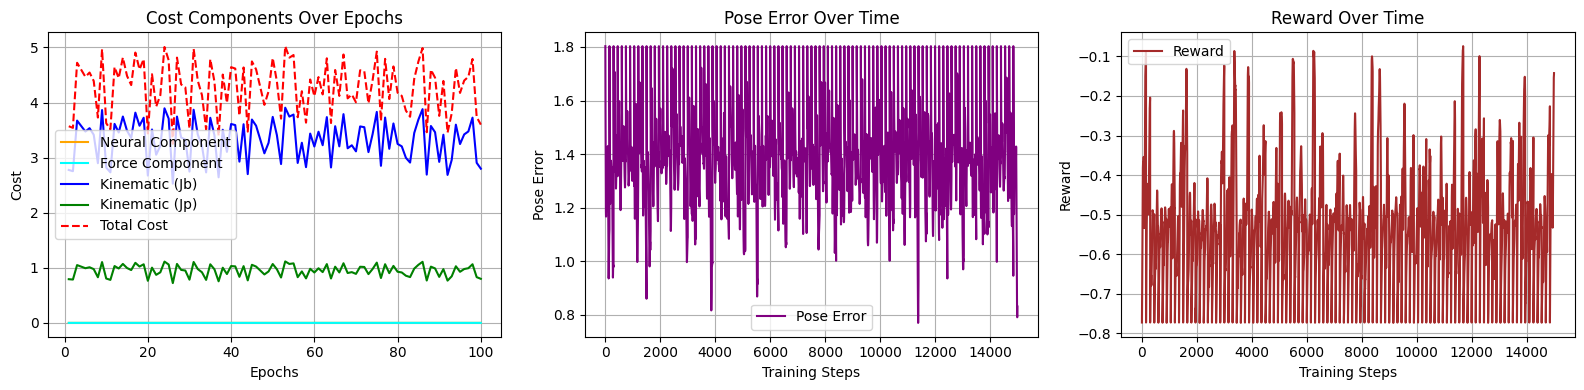

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# Plot all cost components
axes[0].plot(range(1, num_epochs + 1), epoch_costs["neural"], label="Neural Component", color="orange")
axes[0].plot(range(1, num_epochs + 1), epoch_costs["force"], label="Force Component", color="cyan")
axes[0].plot(range(1, num_epochs + 1), epoch_costs["J_b"], label="Kinematic (Jb)", color="blue")
axes[0].plot(range(1, num_epochs + 1), epoch_costs["J_p"], label="Kinematic (Jp)", color="green")
axes[0].plot(range(1, num_epochs + 1), epoch_costs["total"], label="Total Cost", linestyle="--", color="red")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Cost")
axes[0].set_title("Cost Components Over Epochs")
axes[0].legend()
axes[0].grid()

# Plot the pose error over training steps
axes[1].plot(range(len(pose_errors)), pose_errors, label="Pose Error", color="purple")
axes[1].set_xlabel("Training Steps")
axes[1].set_ylabel("Pose Error")
axes[1].set_title("Pose Error Over Time")
axes[1].legend()
axes[1].grid()

# Plot the reward over training steps
axes[2].plot(range(len(rewards)), rewards, label="Reward", color="brown")
axes[2].set_xlabel("Training Steps")
axes[2].set_ylabel("Reward")
axes[2].set_title("Reward Over Time")
axes[2].legend()
axes[2].grid()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()